In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB


In [2]:
df = pd.read_csv("diabetes_binary_5050split_health_indicators.csv")
#the data is taken from kaggle and is a balanced data set with equal number of people with diabetes or prediabetes and No Diabetes
df.shape
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])
print(df.dtypes)

Number of rows:  70692
Number of columns:  22
Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object


In [3]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


The above data in the files can be described as follows:
The target variable Diabetes_binary has 2 classes. 0 is for no diabetes and 1 is for prediabetes or diabetes. This dataset has 22 feature variables and is balanced.

'Diabetes_012' == 0 indicates 'No Diabetes'
'Diabetes_012' == 1 indicates  'Diabetes' or 'Prediabetes'

'HighBP' == 0 indicates 'No High BP'
'HighBP' == 1 indicates 'High BP'

'HighChol' == 0 indicates 'No High Cholesterol'
'HighChol' == 1 indicates 'High Cholesterol'

'CholCheck' == 0 indicates 'No Cholesterol Check in 5 Years'
'CholCheck' == 1 indicates 'Cholesterol Check in 5 Years'

'Smoker' == 0 indicates 'Not a Smoker'
'Smoker' == 1 indicates 'Yes a Smoker'

'Stroke' == 0 indicates 'No' no had stroke
'Stroke' == 1 indicates 'Yes' got a stroke

'HeartDiseaseorAttack' == 0 indicates 'No' not had any heart disease or attack
'HeartDiseaseorAttack' == 1 indicates 'Yes' had heart diesase or attack previously

'PhysActivity' == 0 indicates 'No'
'PhysActivity' == 1 indicates 'Yes'

'Fruits' == 0 indicates 'No' that means people who won't eat fruits regularly
'Fruits' == 1 indicates 'Yes' that means people who eat fruits regularly

'Veggies' == 0 indicates 'No' that means people who won't eat Vegetables regularly
'Veggies' == 1 indicates 'Yes' that means people who eat Vegetables regularly

'HvyAlcoholConsump' == 0 indicates = 'No' means people who do not consume heavy alcohol 
'HvyAlcoholConsump' == 1 indicates = 'Yes' means people who do consume heavy alcohol

'AnyHealthcare' == 0  indicates = 'No'
'AnyHealthcare' == 1  indicates = 'Yes'

'NoDocbcCost' == 0 indicates 'No'
'NoDocbcCost' == 1 indicates 'Yes'

'GenHlth' == 1 indicates 'Excellent' general health and decreases as the value increases
'GenHlth' == 5 indicates 'Poor'

'DiffWalk' == 0  indicates 'No'
'DiffWalk' == 1  indicates 'Yes'

'Sex' == 0 indicates 'Female'
'Sex' == 1 indicates 'Male'

'Education' == 1  indicates 'Never Attended School'
'Education' == 6  indicates 'College graduate'

'Income' == 1 indicates 'Less Than $10,000'
'Income' == 8 indicates '$75,000 or More'

In [4]:
print(df.isna().sum())

Diabetes_binary         0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
dtype: int64


In [5]:
print(df.duplicated().sum())

1635


In [6]:
df.drop_duplicates(inplace=True)

In [8]:
print(df.duplicated().sum())

0


In [9]:
print("Number of rows: ", df.shape[0])
print("Number of columns: ", df.shape[1])

Number of rows:  69057
Number of columns:  22


In [10]:
df.describe()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,...,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000,69057.000000
mean,0.508232,0.571224,0.531329,0.974803,29.955834,0.481935,0.063643,0.150875,0.696483,0.605659,...,0.953908,0.096138,2.863692,3.840103,5.945306,0.258612,0.456464,8.604037,4.900285,5.651332
std,0.499936,0.494905,0.499021,0.156723,7.147972,0.499677,0.244118,0.357930,0.459780,0.488712,...,0.209687,0.294782,1.107950,8.231164,10.139113,0.437875,0.498105,2.858284,1.029338,2.175608
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,1.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,7.000000,4.000000,4.000000
50%,1.000000,1.000000,1.000000,1.000000,29.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,1.000000,33.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,1.000000,0.000000,4.000000,3.000000,6.000000,1.000000,1.000000,11.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


The count of all the records is 69057 indicates that all the records are present and there are no null values.
And most of the data here is binary so the values are in range 0-1 for many features.

In [11]:
df.head()

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,5.0,30.0,0.0,1.0,4.0,6.0,8.0
1,0.0,1.0,1.0,1.0,26.0,1.0,1.0,0.0,0.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,6.0,8.0
2,0.0,0.0,0.0,1.0,26.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,10.0,0.0,1.0,13.0,6.0,8.0
3,0.0,1.0,1.0,1.0,28.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,3.0,0.0,1.0,11.0,6.0,8.0
4,0.0,0.0,0.0,1.0,29.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,8.0,5.0,8.0


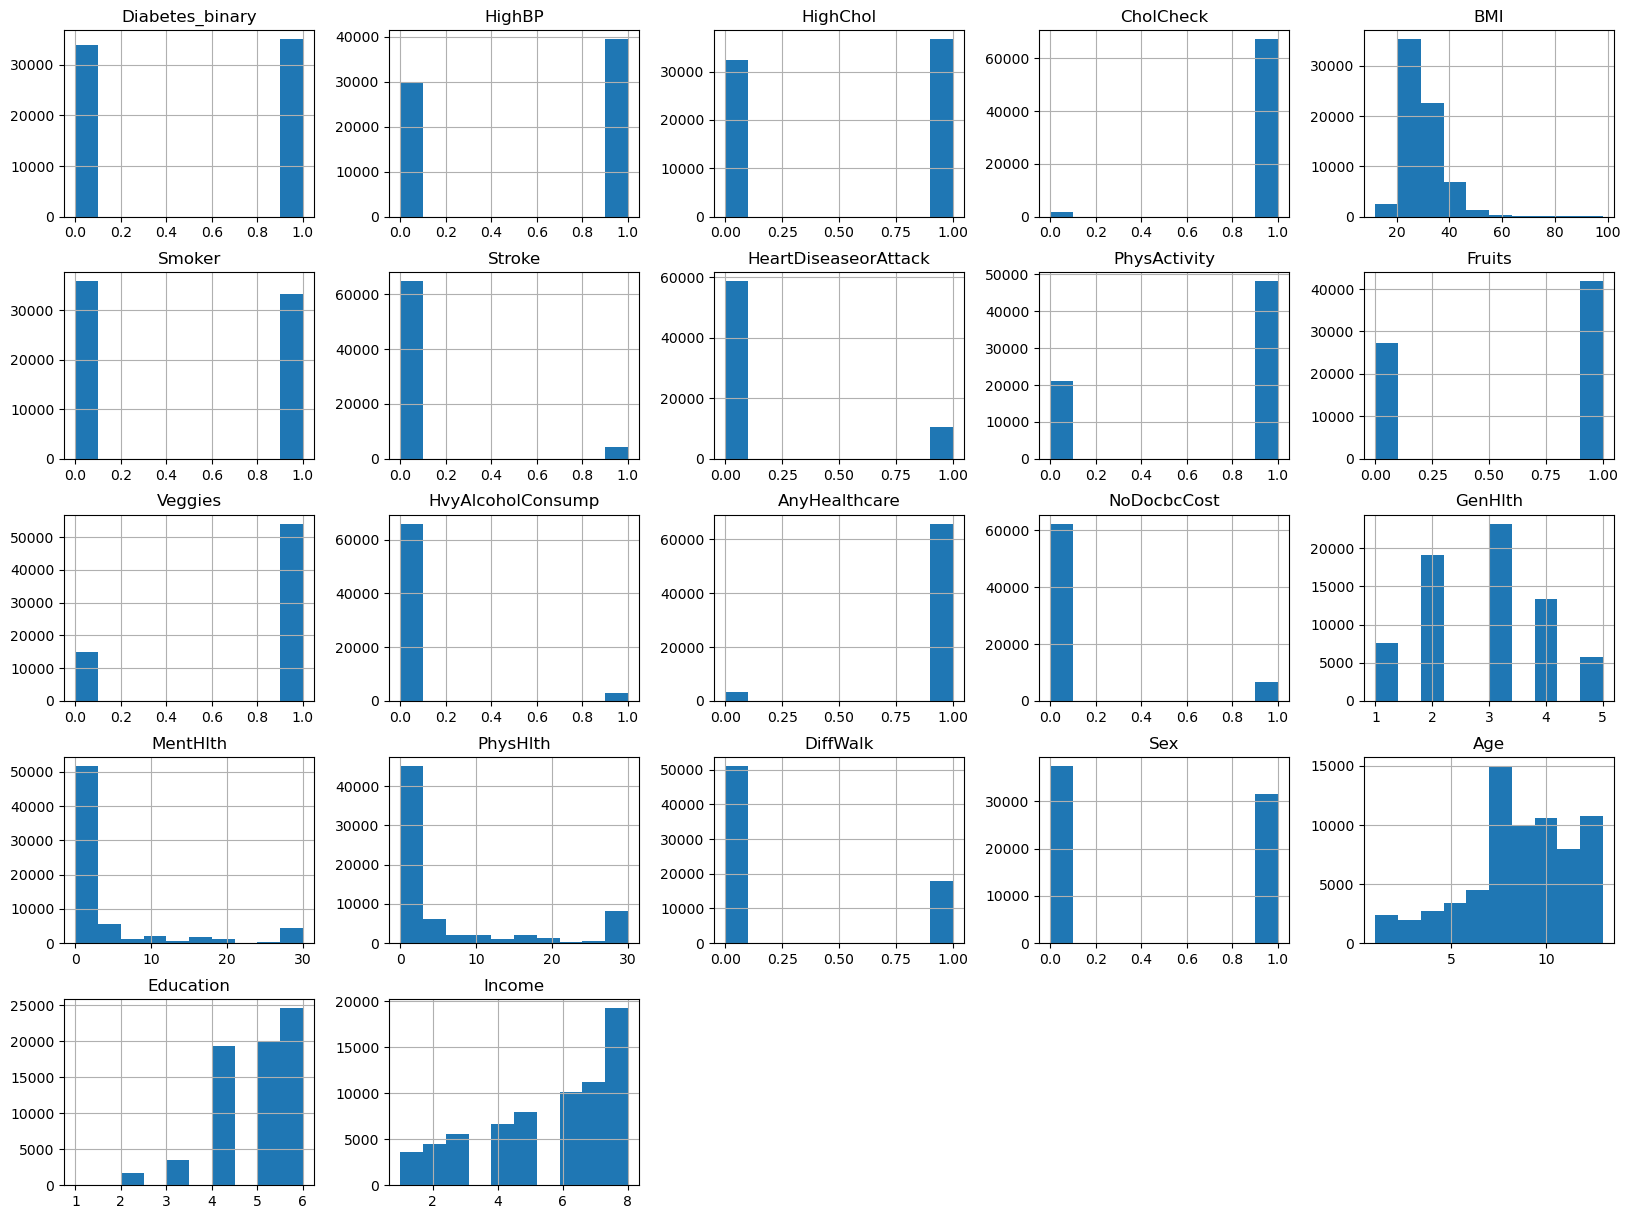

In [12]:
df.hist(figsize=(20,15))
plt.show()

From the above plots we can see that we are having the counts of people with diabetes and without diabetes in given dataset are almost equally distributed, it is similar for other properties(features) such as highBP, HighChol, Veggies, Age, Sex, Income, GenHlth. 
But the counts of the values is mostly biased and not equally distributed fot few other properties(features) such as cholCheck, stroke, HvyAlcoholConsump, AnyhealthCare, NoDocbcCost Education.
We need to plot and compare the Daibetes with other properties(features) and check whether we need to include other properties for implementing algorithm

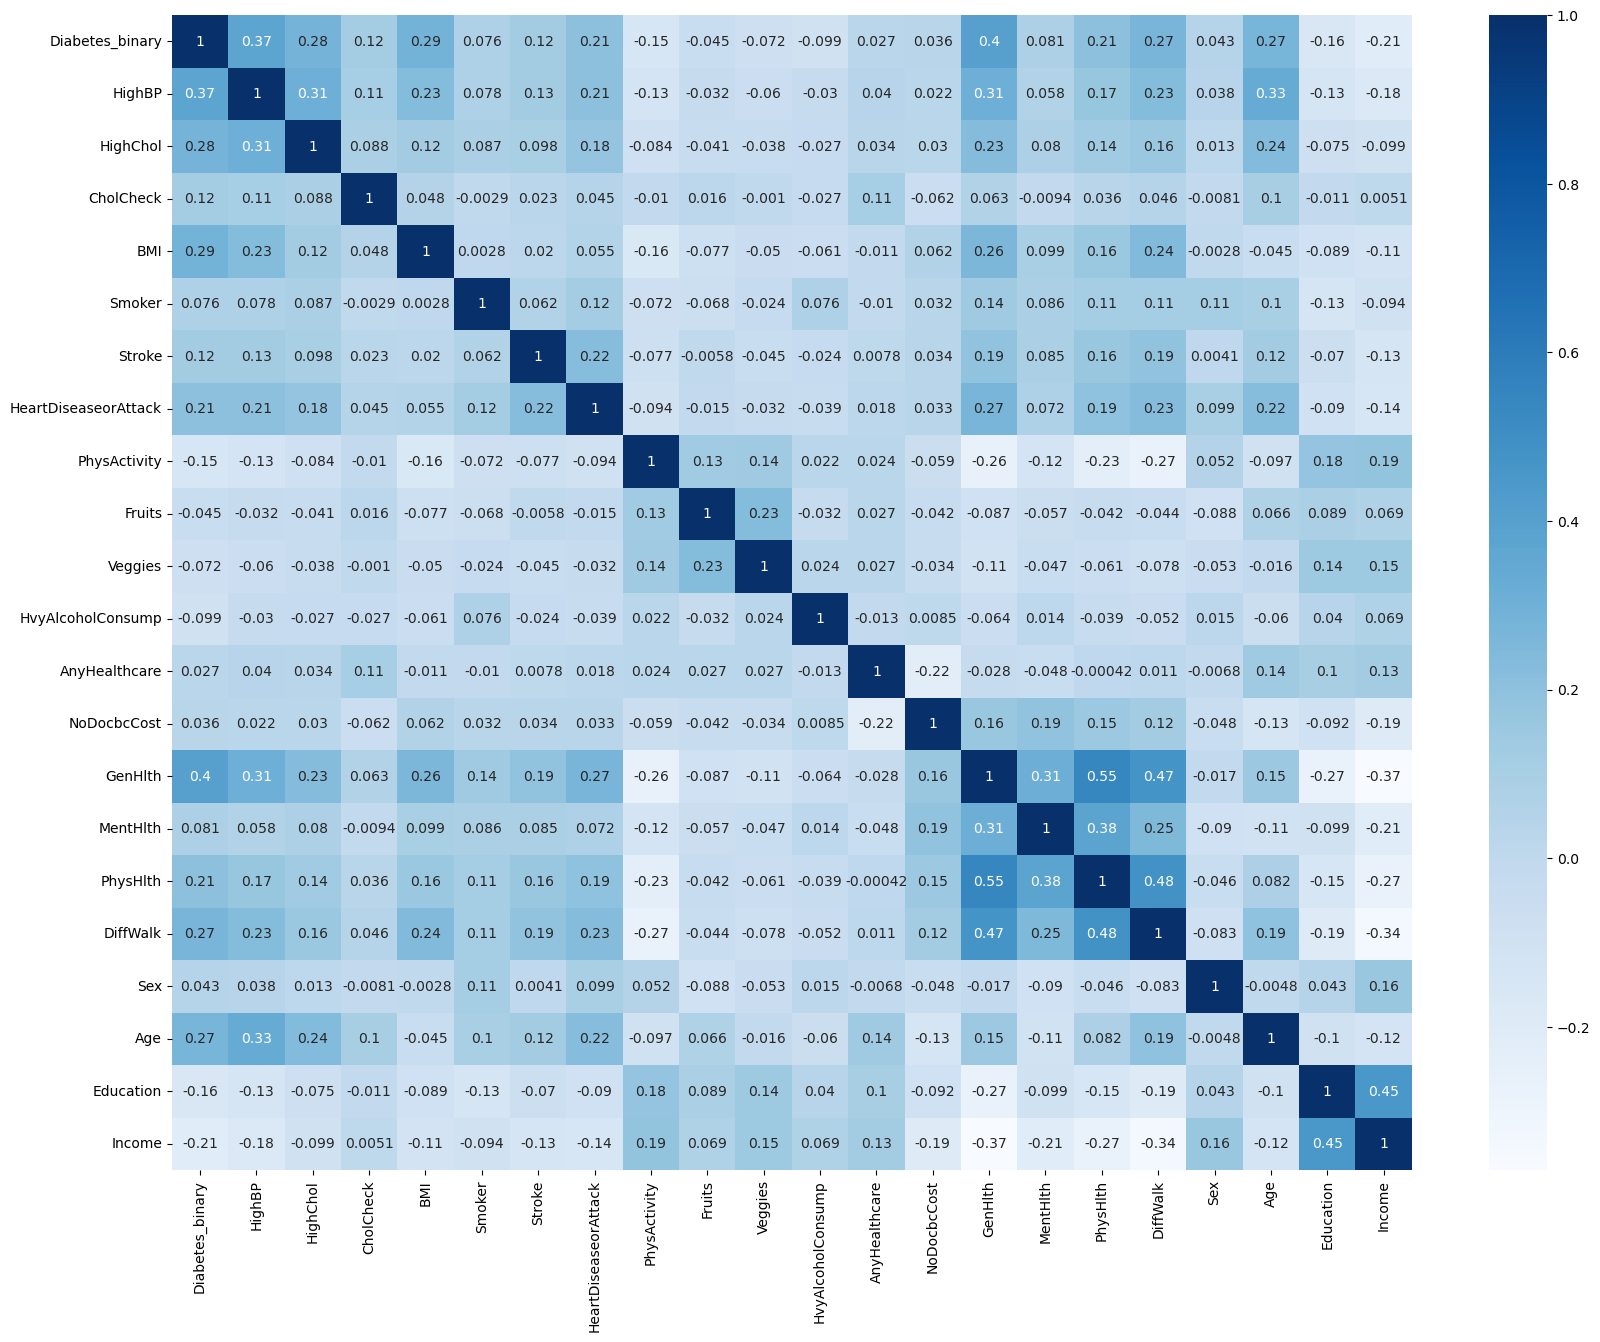

In [13]:
plt.figure(figsize=(20,15))
sns.heatmap(df.corr(),annot=True,cmap='Blues')
plt.show()

From the correlation heatmap we can see that there is higher correlation between diabetes and Genhealth, HighBP, BMI, Education that means if the value of these propeties increase, then the chance of diabetes also increases.
The correlation between physHlth and GenHlth is also high compared to other properties it means they are directly proportional to each other.

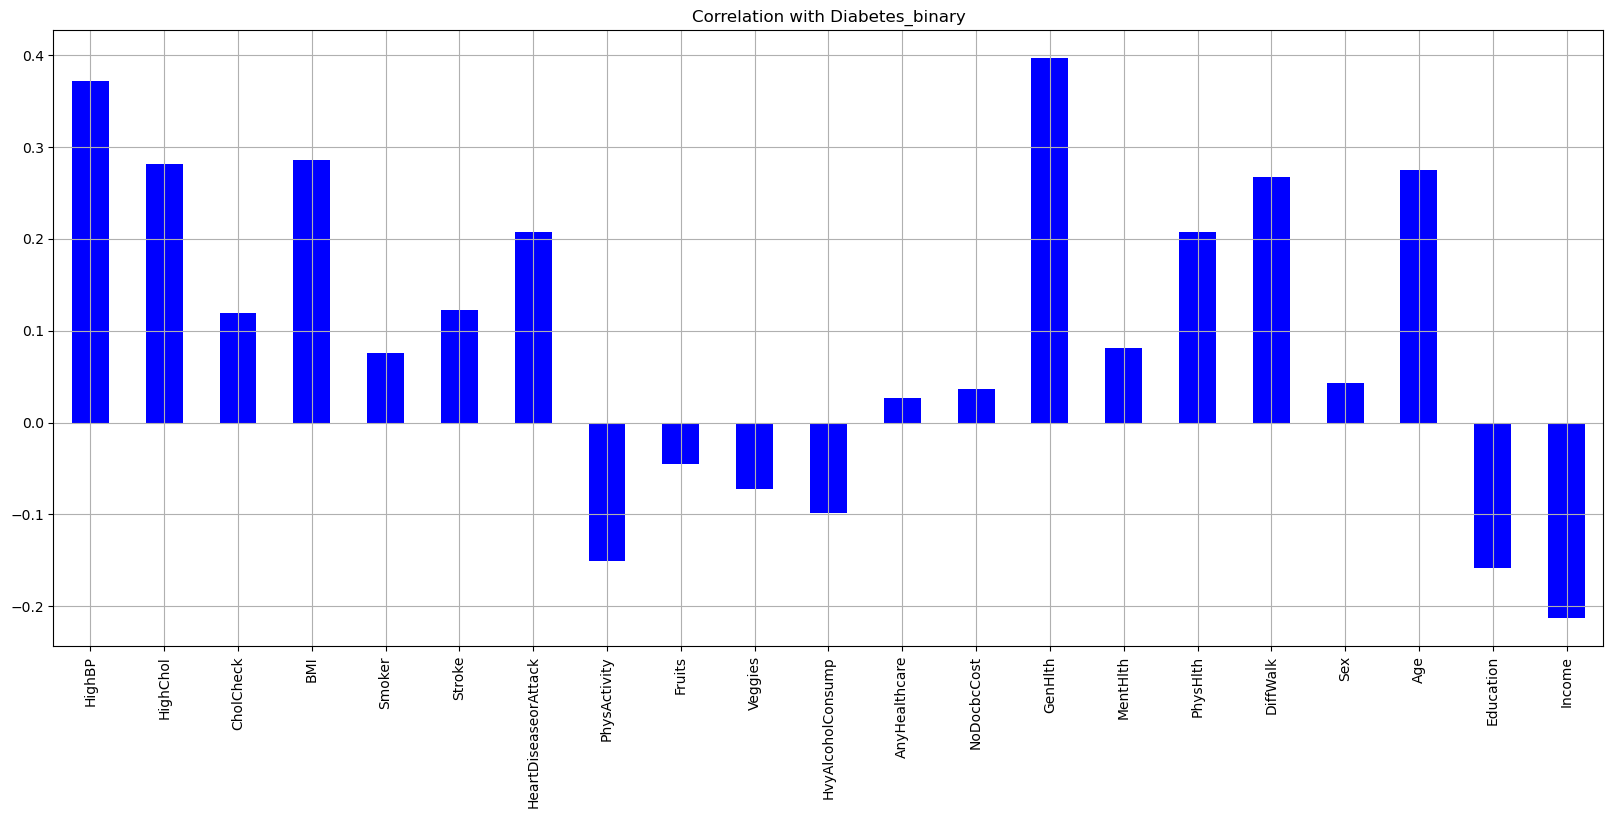

In [14]:
df.drop('Diabetes_binary', axis=1).corrwith(df.Diabetes_binary).plot(kind='bar', grid=True, figsize=(20, 8),
                                                                     title="Correlation with Diabetes_binary",color="Blue")
plt.show()

The above plot shows that the HighBP, HighChol, BMI, HeartDiseaseorAttach, GenHealth, PhysHlth, DiffWalk, Age are positively correlated and physActivity, Education, Income are negatively correlated compared to other features.

In [15]:
print(df['HighBP'].value_counts(dropna=False))

1.0    39447
0.0    29610
Name: HighBP, dtype: int64


In [16]:
print(df['HighChol'].value_counts(dropna=False))

1.0    36692
0.0    32365
Name: HighChol, dtype: int64


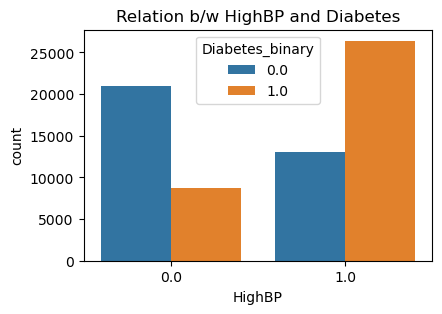

In [17]:
plt.figure(figsize=(4.5, 3))
sns.countplot(x="HighBP" , data = df , hue="Diabetes_binary" )
plt.title("Relation b/w HighBP and Diabetes")
plt.show()

By observing the above count plot we can see that people having high BP has higher chances of getting Diabetes compared to the people without highBP.

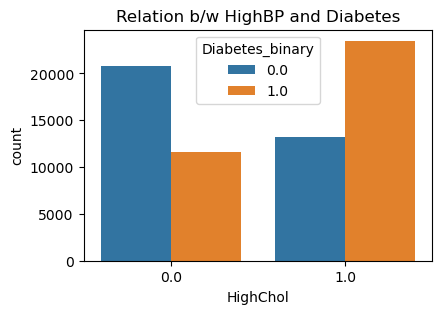

In [18]:
plt.figure(figsize=(4.5, 3))
sns.countplot(x="HighChol" , data = df , hue="Diabetes_binary" )
plt.title("Relation b/w HighBP and Diabetes")
plt.show()

By observing the above count plot we can see that people with high colestrol has high chances of diabetes compared with people with less Cholestrol.
We also know that High Colestrol and High BP are inter related, high cholestrol causes hight BP

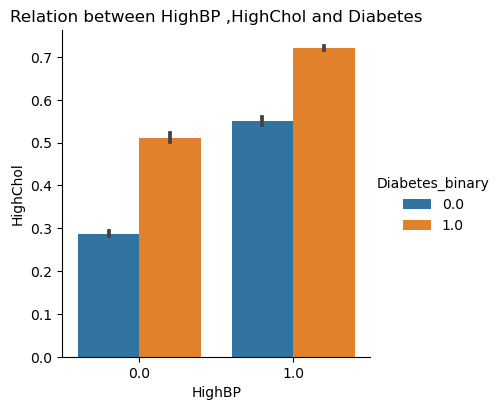

In [19]:
sns.catplot(x="HighBP" , y ="HighChol" , data = df , hue="Diabetes_binary" , kind="bar", height=4 );
plt.title("Relation between HighBP ,HighChol and Diabetes")
plt.show()

From the above catplot both HighBP and HighChol have combinely have great effect in diabetes.

In [20]:
(df.groupby(["HighBP" , "HighChol"])["Diabetes_binary"].value_counts()/
 df.groupby(["HighBP" , "HighChol"])["Diabetes_binary"].count())*100

HighBP  HighChol  Diabetes_binary
0.0     0.0       0.0                77.824202
                  1.0                22.175798
        1.0       0.0                57.507407
                  1.0                42.492593
1.0     0.0       1.0                55.643819
                  0.0                44.356181
        1.0       1.0                72.629532
                  0.0                27.370468
Name: Diabetes_binary, dtype: float64

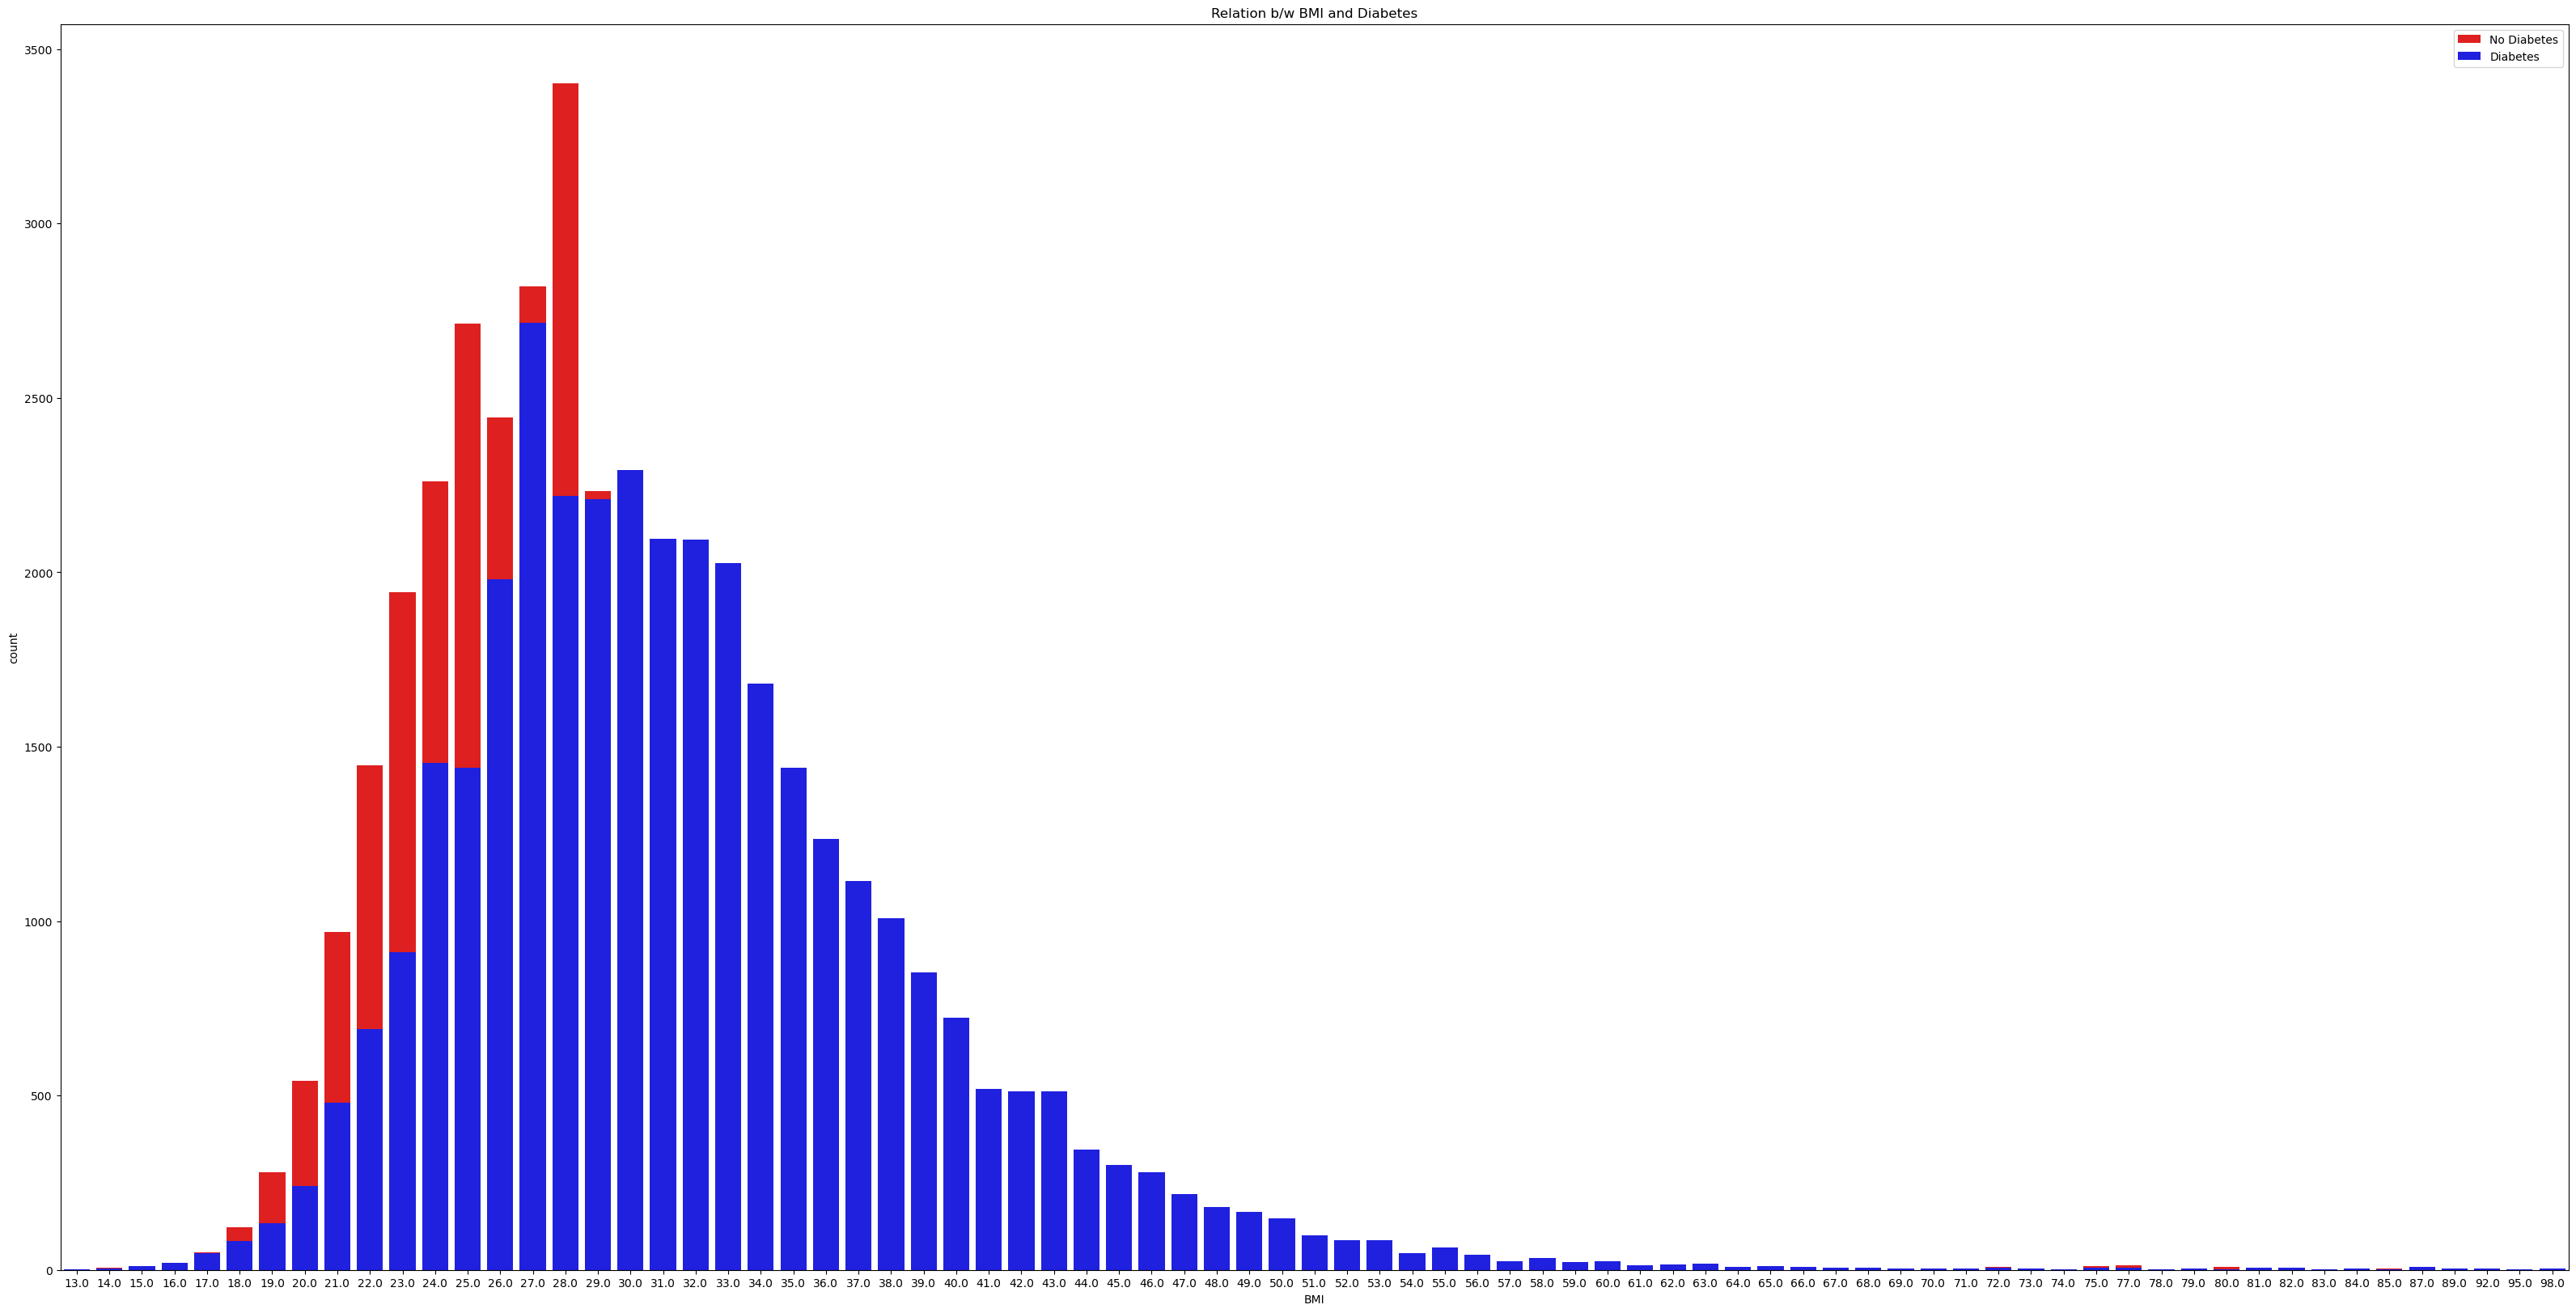

In [21]:
import warnings
plt.figure(figsize=(40, 20))
warnings.filterwarnings('ignore')

sns.countplot(df.BMI[df.Diabetes_binary == 0], color="r", label="No Diabetes")
sns.countplot(df.BMI[df.Diabetes_binary == 1], color="b", label="Diabetes" )
plt.title("Relation b/w BMI and Diabetes")

plt.legend()
plt.show()

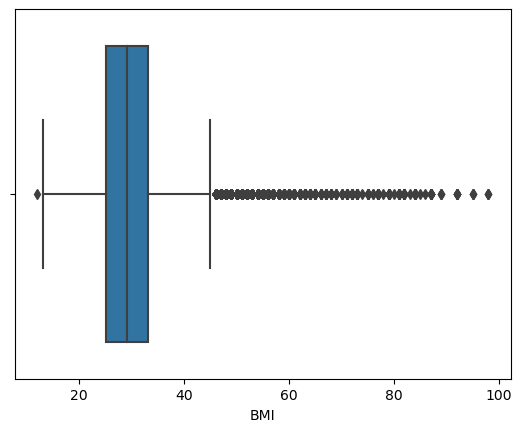

<Figure size 450x300 with 0 Axes>

In [24]:
sns.boxplot(df["BMI"])
plt.figure(figsize=(4.5, 3))
plt.show()

From the above plot we can see that most of the BMI values are concentrated between 20 and 50 and the people having diabetes and not having are almost equally distributed.

In [25]:
df[(df["BMI"]<=20)]["Diabetes_binary"].value_counts()

0.0    1990
1.0     545
Name: Diabetes_binary, dtype: int64

In [26]:
df[(df["BMI"]>20) & (df["BMI"]<=50)]["Diabetes_binary"].value_counts()

1.0    33849
0.0    31750
Name: Diabetes_binary, dtype: int64

In [27]:
df[(df["BMI"]>=50)]["Diabetes_binary"].value_counts()

1.0    851
0.0    267
Name: Diabetes_binary, dtype: int64

The BMI values are concentrated between 20 and 50 and sparesly distributed at other values.
The model works well if the data is properly distributed.

In [28]:
pd.crosstab(df.Smoker,df.Diabetes_binary)

Diabetes_binary,0.0,1.0
Smoker,,
0.0,18902,16874
1.0,15058,18223


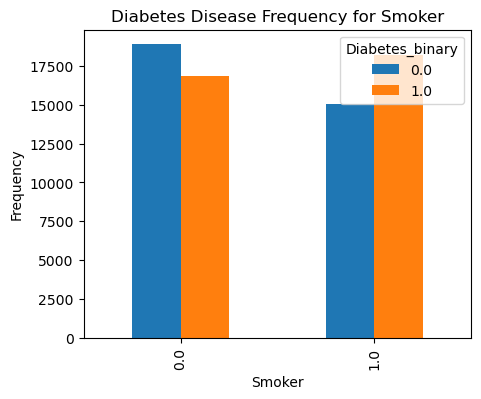

In [30]:
pd.crosstab(df.Smoker,df.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for Smoker')
plt.xlabel("Smoker")
plt.ylabel('Frequency')
plt.show()

By observing the plot we can see that people who smoke has more chance of diabetes compared to people who don't smoke.

In [31]:
pd.crosstab(df.HvyAlcoholConsump,df.Diabetes_binary)

Diabetes_binary,0.0,1.0
HvyAlcoholConsump,,
0.0,31787,34265
1.0,2173,832


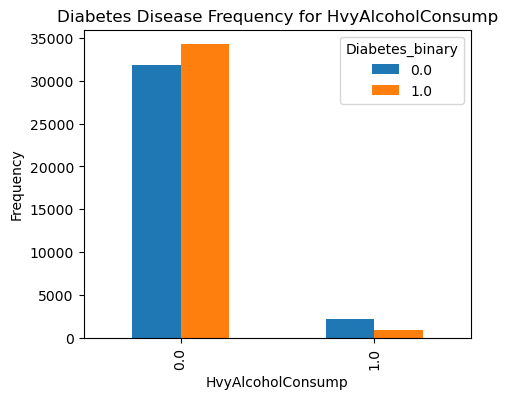

In [32]:
pd.crosstab(df.HvyAlcoholConsump,df.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for HvyAlcoholConsump')
plt.xlabel("HvyAlcoholConsump")
plt.ylabel('Frequency')
plt.show()

By observing the above graph we can see that in the given data there are more records with HvyAlcoholConsump = 0 and less records for HvyAlcoholConsump = 1 so we might say that this data is not exactly clear.

In [33]:
(df.groupby(["Smoker" , "HvyAlcoholConsump"])["Diabetes_binary"].value_counts()/
 df.groupby(["Smoker" , "HvyAlcoholConsump"])["Diabetes_binary"].count())*100

Smoker  HvyAlcoholConsump  Diabetes_binary
0.0     0.0                0.0                52.064332
                           1.0                47.935668
        1.0                0.0                79.097154
                           1.0                20.902846
1.0     0.0                1.0                56.251797
                           0.0                43.748203
        1.0                0.0                68.831823
                           1.0                31.168177
Name: Diabetes_binary, dtype: float64

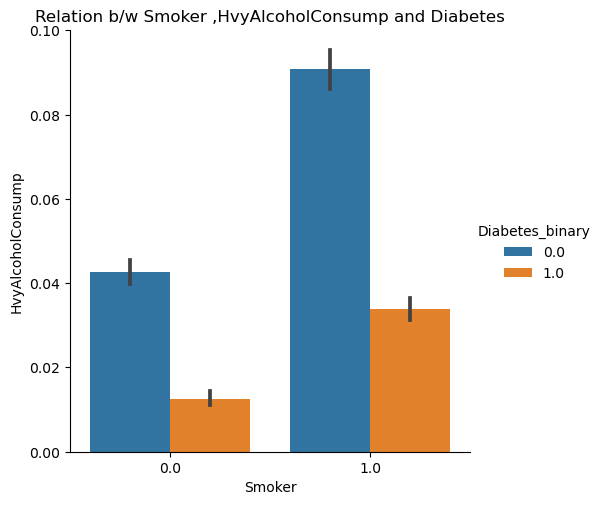

In [43]:
sns.catplot(x="Smoker" , y ="HvyAlcoholConsump" , data = df , hue="Diabetes_binary"  , kind="bar"  );  
plt.title("Relation b/w Smoker ,HvyAlcoholConsump and Diabetes")

plt.show()

Acording to the above plot, smoking and HvyAlcoholConsump both together increase the risk of diabetes

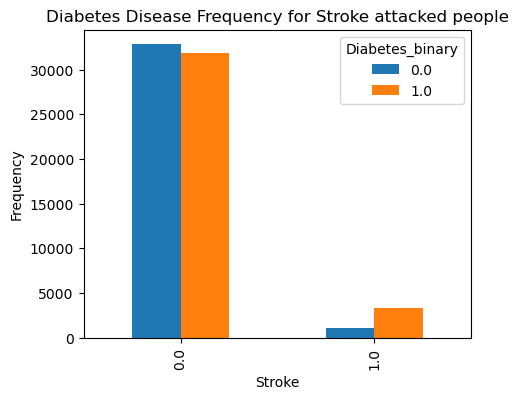

In [34]:
pd.crosstab(df.Stroke,df.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for Stroke attacked people')
plt.xlabel("Stroke")
plt.ylabel('Frequency')
plt.show()

By observing the above graph we can see that in the given data there are more records with stroke = 0 and less records for stroke = 1 so we might say that this data is not exactly clear. But in the given data the people who got stroke atleast once had more chance of daignosing for diabetes compared to those who not.

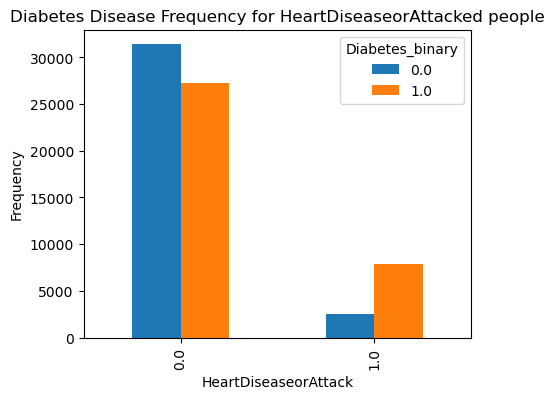

In [35]:
pd.crosstab(df.HeartDiseaseorAttack,df.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for HeartDiseaseorAttacked people')
plt.xlabel("HeartDiseaseorAttack")
plt.ylabel('Frequency')
plt.show()

By observing the above graph we can see that in the given data there are more records with HeartDiseaseorAttack = 0 and less records for HeartDiseaseorAttack = 1. But in the given data the people who got HeartDiseaseorAttack atleast once had more chance of daignosing for diabetes compared to those who not.

In [36]:
(df.groupby(["Stroke" , "HeartDiseaseorAttack"])["Diabetes_binary"].value_counts()/
 df.groupby(["Stroke" , "HeartDiseaseorAttack"])["Diabetes_binary"].count())*100

Stroke  HeartDiseaseorAttack  Diabetes_binary
0.0     0.0                   0.0                54.469651
                              1.0                45.530349
        1.0                   1.0                73.906844
                              0.0                26.093156
1.0     0.0                   1.0                68.227425
                              0.0                31.772575
        1.0                   1.0                81.677484
                              0.0                18.322516
Name: Diabetes_binary, dtype: float64

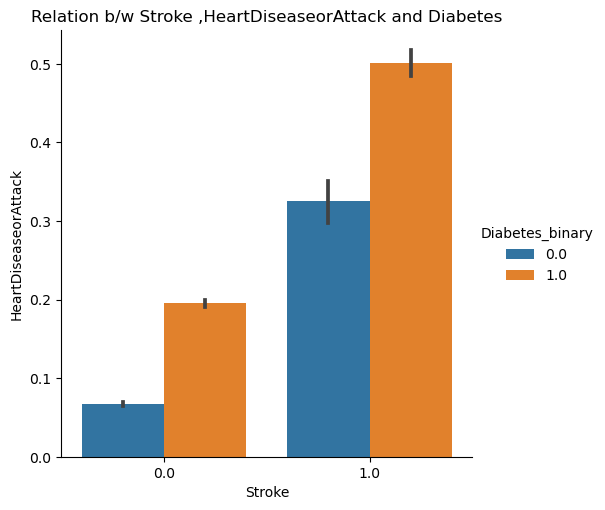

In [37]:
sns.catplot(x="Stroke" , y ="HeartDiseaseorAttack" , data = df , hue="Diabetes_binary"  , kind="bar"  );
plt.title("Relation b/w Stroke ,HeartDiseaseorAttack and Diabetes")
plt.show()

Acording to the above plot, stroke and heartDiseaseorAttack together increases the risk of Diabetes

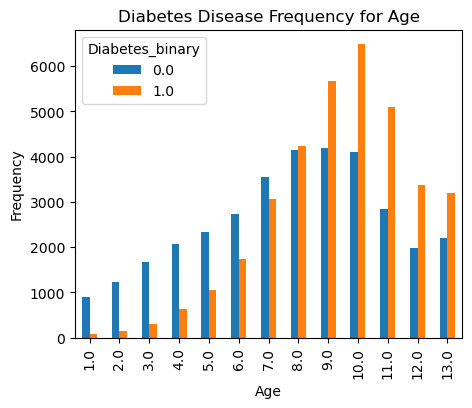

In [37]:
pd.crosstab(df.Age,df.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for Age')
plt.xlabel("Age")
plt.ylabel('Frequency')
plt.show()

From the above chart we can see that the people at old age has more chances of daibetes compared to young people

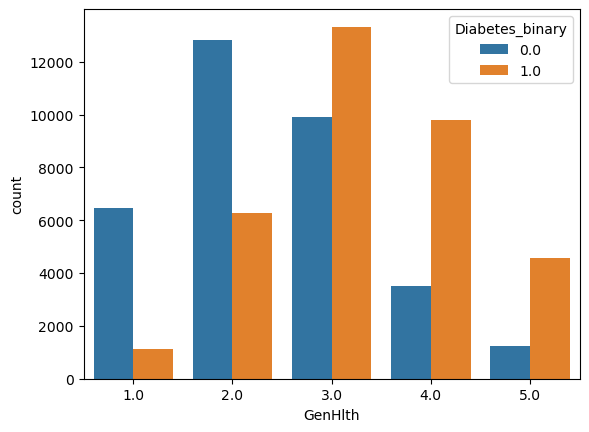

In [38]:
sns.countplot(x='GenHlth', hue='Diabetes_binary', data=df)
plt.show()

From the above chart we can see that the people with good general health are less prone to diabetes compared to the people with bad general health.

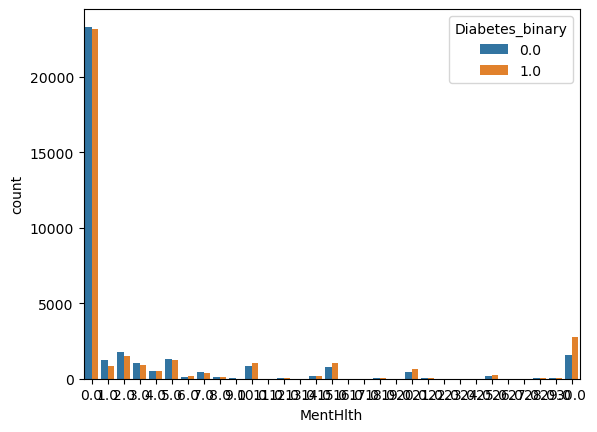

In [39]:
sns.countplot(x='MentHlth', hue='Diabetes_binary', data=df)
plt.show()

From the above chart we can see that most of the data is present where the MentHlth = 0, but we can observe that the people with good general health are less prone to diabetes compared to the people with bad general health. If the data was more distributed the model can be trained properly.

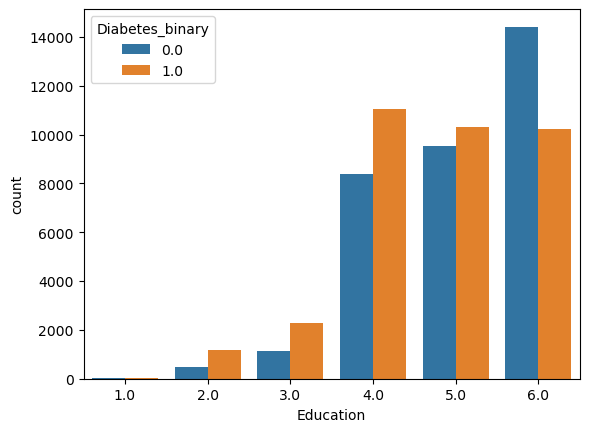

In [40]:
sns.countplot(x='Education', hue='Diabetes_binary', data=df)
plt.show()

From the above data we can see that the people who are highly educated(6.0) are less prone to diabetes may be because they might take some extra precautions compared to other people.

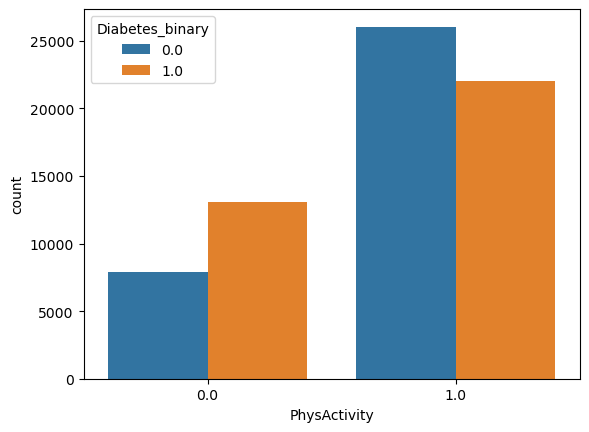

In [41]:
sns.countplot(x='PhysActivity', hue='Diabetes_binary', data=df)
plt.show()

From the above plot we can say that people who are active in physical activity are less prone to diabetes comapared to people with less physical activity

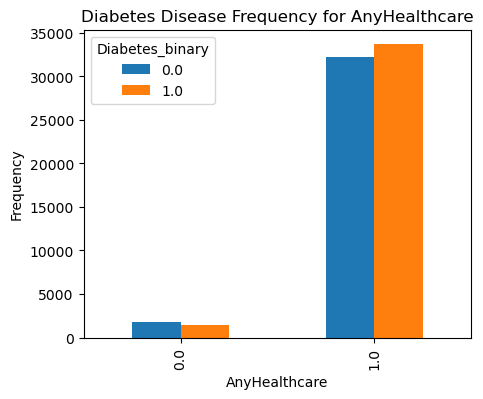

In [42]:
pd.crosstab(df.AnyHealthcare,df.Diabetes_binary).plot(kind="bar",figsize=(5,4))

plt.title('Diabetes Disease Frequency for AnyHealthcare')
plt.xlabel("AnyHealthcare")
plt.ylabel('Frequency')
plt.show()

The data of people enrolled in health care is biased, but in given data we can observe that the people in healthcare are more prone to diabetes compared to people who have not been to any health care.

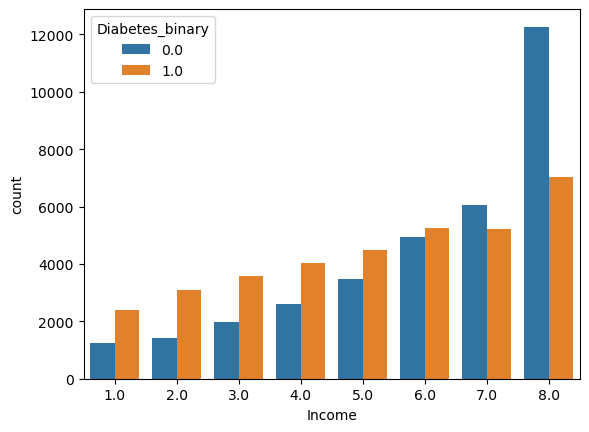

In [43]:
sns.countplot(x='Income', hue='Diabetes_binary', data=df)
plt.show()

From the above plot we can see that people with high income are less prone to diabetes compared to people with less income, the reason might be because the people with high income can enroll and follow best health rouitne, habits and practices compared to the people with less income.

# Implementing Logistic Regression and Navie Bayes on all features

In [44]:
X = df.drop("Diabetes_binary", axis=1)
y = df["Diabetes_binary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report,accuracy_score
LR1 = LogisticRegression(random_state=123, max_iter = 1000)

LR1.fit(X_train, y_train)

y_pred = LR1.predict(X_test)
print("Accuracy Score:",  accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7511584129742254
              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74      6723
         1.0       0.75      0.77      0.76      7089

    accuracy                           0.75     13812
   macro avg       0.75      0.75      0.75     13812
weighted avg       0.75      0.75      0.75     13812



In [46]:
import sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
NB1 = GaussianNB()
NB1.fit(X_train, y_train)

y_pred = NB1.predict(X_test)
print("Accuracy Score:",  accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.723573704025485
              precision    recall  f1-score   support

         0.0       0.71      0.73      0.72      6723
         1.0       0.74      0.72      0.73      7089

    accuracy                           0.72     13812
   macro avg       0.72      0.72      0.72     13812
weighted avg       0.72      0.72      0.72     13812



From the above metrics we can see that Logistic Regression has high score compared to Naive Bayes algoritm

# Implementing algorithms on only correlated features

In [47]:
keys1 = ['HighBP', 'HighChol', 'BMI', 'HeartDiseaseorAttack','GenHlth','PhysHlth','DiffWalk', 'Age', 'Education','Income']

X = df[keys1]
y = df["Diabetes_binary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [48]:
LR2 = LogisticRegression(random_state=123, max_iter = 1000)

LR2.fit(X_train, y_train)

y_pred = LR2.predict(X_test)
print("Accuracy Score:",  accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7485519837822183
              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74      6723
         1.0       0.75      0.77      0.76      7089

    accuracy                           0.75     13812
   macro avg       0.75      0.75      0.75     13812
weighted avg       0.75      0.75      0.75     13812



In [49]:
NB2 = GaussianNB()
NB2.fit(X_train, y_train)

y_pred = NB2.predict(X_test)
print("Accuracy Score:",  accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7104691572545613
              precision    recall  f1-score   support

         0.0       0.68      0.77      0.72      6723
         1.0       0.75      0.65      0.70      7089

    accuracy                           0.71     13812
   macro avg       0.71      0.71      0.71     13812
weighted avg       0.72      0.71      0.71     13812



From the above metrics we can see that Logistic Regression has high score compared to Naive Bayes algoritm

# Implementing algorithm by including few other features

In [50]:
keys2 = [ 'HighBP', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity','Fruits', 'Veggies', 'HvyAlcoholConsump',
         'AnyHealthcare', 'NoDocbcCost', 'GenHlth', 'PhysHlth', 'Sex', 'Age', 'Education','Income']
X = df[keys2]
y = df["Diabetes_binary"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [51]:
LR3 = LogisticRegression(random_state=123, max_iter = 1000)

LR3.fit(X_train, y_train)

y_pred = LR3.predict(X_test)
print("Accuracy Score:",  accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.7479003764842166
              precision    recall  f1-score   support

         0.0       0.75      0.73      0.74      6723
         1.0       0.75      0.77      0.76      7089

    accuracy                           0.75     13812
   macro avg       0.75      0.75      0.75     13812
weighted avg       0.75      0.75      0.75     13812



In [52]:
NB3 = GaussianNB()
NB3.fit(X_train, y_train)

y_pred = NB3.predict(X_test)
print("Accuracy Score:",  accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

Accuracy Score: 0.719084853750362
              precision    recall  f1-score   support

         0.0       0.70      0.74      0.72      6723
         1.0       0.74      0.70      0.72      7089

    accuracy                           0.72     13812
   macro avg       0.72      0.72      0.72     13812
weighted avg       0.72      0.72      0.72     13812



From the above metrics we can see that Logistic Regression has high score compared to Naive Bayes algoritm in all the three implemetations.

In all three implemetations Logistic regression score is high compared to Naive bayes. But overall accuracy score is 75 for the Logistic Regression we can improve the score by doing some more work on exploratory analysis and feature selection we can improve the accuracy score. 